### tf.slim cifar10 with vgg16
Tutorial:
https://github.com/tensorflow/tensorflow/blob/129665119ea60640f7ed921f36db9b5c23455224/tensorflow/contrib/slim/python/slim/learning.py
    

## Prepare images

In [2]:
import cifar10
import os

# The CIFAR-10 data-set is about 163 MB and will be downloaded automatically
if os.path.exists("./data/CIFAR-10/"):
    cifar10.data_path = "./data/CIFAR-10/"
else:
    cifar10.maybe_download_and_extract()
class_names = cifar10.load_class_names()

images_train, cls_train, labels_train = cifar10.load_training_data()

images_test, cls_test, labels_test = cifar10.load_test_data()
print("images_train.shape",images_train.shape)

Loading data: ./data/CIFAR-10/cifar-10-batches-py/batches.meta
Loading data: ./data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: ./data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: ./data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: ./data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: ./data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: ./data/CIFAR-10/cifar-10-batches-py/test_batch
images_train.shape (50000, 32, 32, 3)


In [3]:
import tensorflow as tf

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
resizedImages = tf.image.resize_images(x, (224,224)) 

config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC'
with tf.Session(config = config) as sess:
    sess.run(tf.global_variables_initializer())
    output = sess.run(resizedImages, feed_dict={x: images_train[:500]})
    print (output.shape)
    
images = output
labels = labels_train[:500]
print (images.shape)
print (labels.shape)

C:\Users\cueva\Anaconda3\envs\tf_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(500, 224, 224, 3)
(500, 224, 224, 3)
(500, 10)


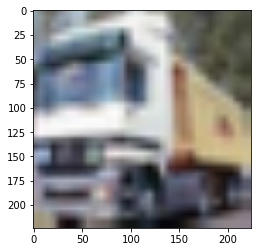

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(images[1])

## Laod model and retrain

In [4]:
'''
example code comes from:
https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/slim
'''

import tensorflow as tf
import tensorflow.contrib.slim.nets as nets


# init slim, get vgg net
slim = tf.contrib.slim
vgg = nets.vgg


# create log dir
train_log_dir = "./vgg_log"
if not tf.gfile.Exists(train_log_dir):
    tf.gfile.MakeDirs(train_log_dir)

with tf.Graph().as_default():
    # Set up the data loading:
    images, labels = images.astype('float32'), cls_train

    # Define the model:
    predictions, _ = vgg.vgg_16(images, is_training=True)

    # Specify the loss function:
    loss = slim.losses.softmax_cross_entropy(predictions, labels)
    #slim.losses.softmax_cross_entropy(predictions, labels)

    #total_loss = slim.losses.get_total_loss()
    #tf.summary.scalar('losses/total_loss', total_loss)

    # Specify the optimization scheme:
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001)

    # create_train_op that ensures that when we evaluate it to get the loss,
    # the update_ops are done and the gradient updates are computed.
    #train_tensor = slim.learning.create_train_op(total_loss, optimizer)

    # Actually runs training.
    slim.learning.train(loss, train_log_dir)

Instructions for updating:
Use tf.losses.softmax_cross_entropy instead. Note that the order of the logits and labels arguments has been changed.


AttributeError: 'numpy.ndarray' object has no attribute 'get_shape'

# Load Model and Predict
https://github.com/oduerr/tf_r/blob/master/load_vgg16/load_vgg16.py

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
import tensorflow.contrib.slim.nets as nets

img1 = cv2.imread('./data/apple.jpg')

print(img1.shape)
print("Some pixels {}".format(img1[199,199:205,0]))
#plt.imshow(img1)
#plt.show()

images = tf.placeholder(tf.float32, [None, None, None, 3])
imgs_scaled = tf.image.resize_images(images, (224,224))

fc8, _endpoints = slim.nets.vgg.vgg_16(imgs_scaled, is_training=False)
variables_to_restore = slim.get_variables_to_restore()
print('Number of variables to restore {}'.format(len(variables_to_restore)))
init_assign_op, init_feed_dict = slim.assign_from_checkpoint('./weights/vgg_16.ckpt', variables_to_restore)

# tf.train.SummaryWriter('/tmp/dumm/vgg16_py', tf.get_default_graph()).close()

with tf.Session() as sess:
    sess.run(init_assign_op, init_feed_dict)
    prob = sess.run(fc8, {images:[img1]})[0]
    print("The first predictions {}".format(prob[0:5]))
    preds = (np.argsort(prob)[::-1])[0:10]
    for p in preds:
        print (p)